# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Train Data

In [3]:
df1=pd.read_csv("C:\\Users\\sampa\\Desktop\\black_friday\\black_friday\\blackFriday_train.csv")
df1.shape

(550068, 12)

# Test Data

In [4]:
df2=pd.read_csv("C:\\Users\\sampa\\Desktop\\black_friday\\black_friday\\blackFriday_test.csv")
df2.shape

(233599, 11)

# Merging Both Train and Test Data

In [5]:
data=df1.append(df2,sort=False)
data.shape

(783667, 12)

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


---------Dropping Unwanted Columns---------

In [8]:
data.drop(['User_ID'],axis=1,inplace=True)

# Data cleaning & Data Setting

In [9]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
data['Gender']=data['Gender'].map({'F':0,'M':1})

In [11]:
data['Gender'].unique()

array([0, 1], dtype=int64)

In [12]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
data['Age']=data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
data['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [15]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
dummy_city=pd.get_dummies(data['City_Category'],drop_first=True)
dummy_city.head(5)

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [17]:
data=pd.concat([data,dummy_city],axis=1)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
data.drop(['City_Category'],axis=1,inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [20]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [21]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')

In [22]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [26]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4':4})

In [27]:
data['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [28]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [29]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
data['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [31]:
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [32]:
data['Product_Category_3']=data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [33]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [37]:
data['Purchase']=data['Purchase'].fillna(data['Purchase'].mean())

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [40]:
data_final=data.copy()

In [41]:
data_final.drop('Product_ID',axis=1,inplace=True)

In [42]:
data_final.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


# Some Visualisations

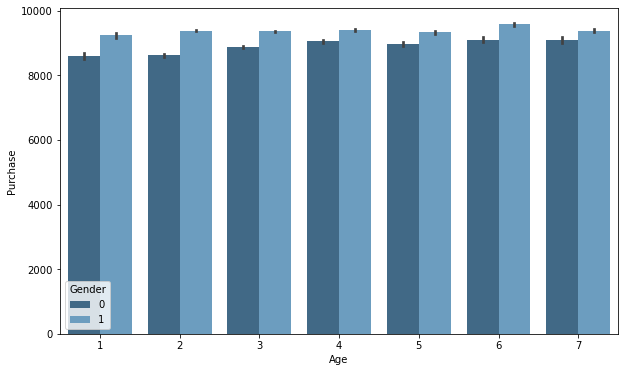

In [66]:
plt.figure(figsize=(10,6))
sns.barplot('Age','Purchase',data=data_final,hue='Gender',palette='Blues_d')

# Purchasing of goods of each range of age are almost equal. We can conclude that the percentage of purchasing goods of men over women is higher.

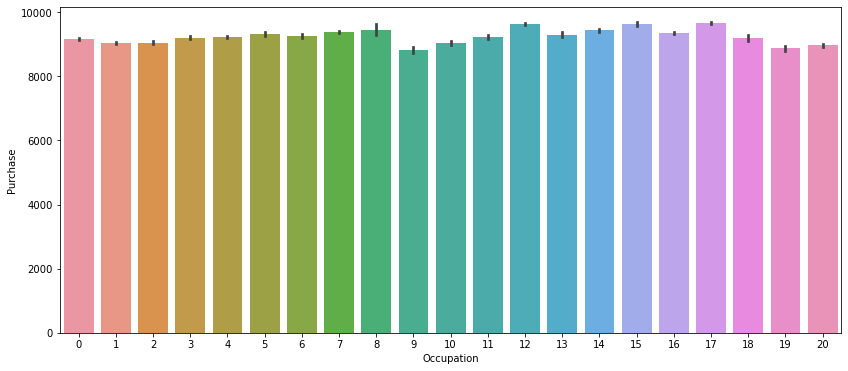

In [57]:
plt.figure(figsize=(14,6))
sns.barplot('Occupation','Purchase',data=data_final)

# All the occupation contributes almost same in purchasing rates

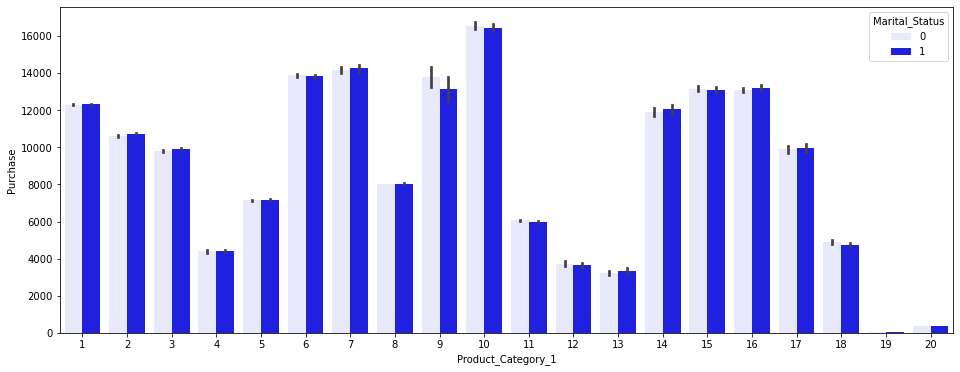

In [64]:
plt.figure(figsize=(16,6))
sns.barplot('Product_Category_1','Purchase',hue='Marital_Status',data=data_final,color='blue')

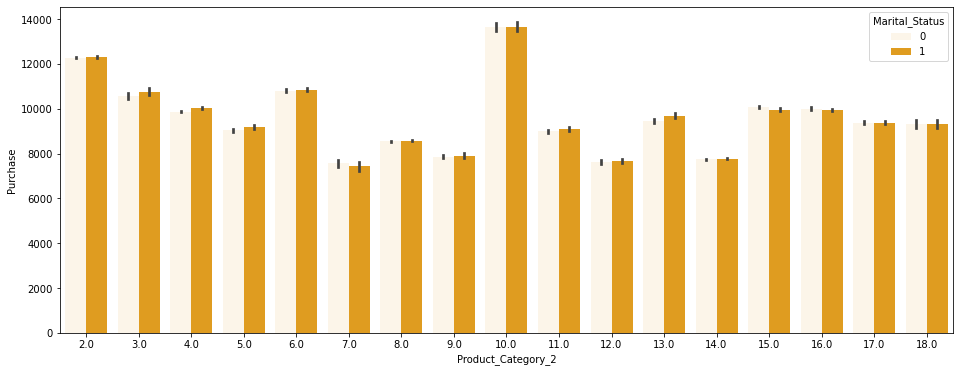

In [63]:
plt.figure(figsize=(16,6))
sns.barplot('Product_Category_2','Purchase',hue='Marital_Status',data=data_final,color='orange')

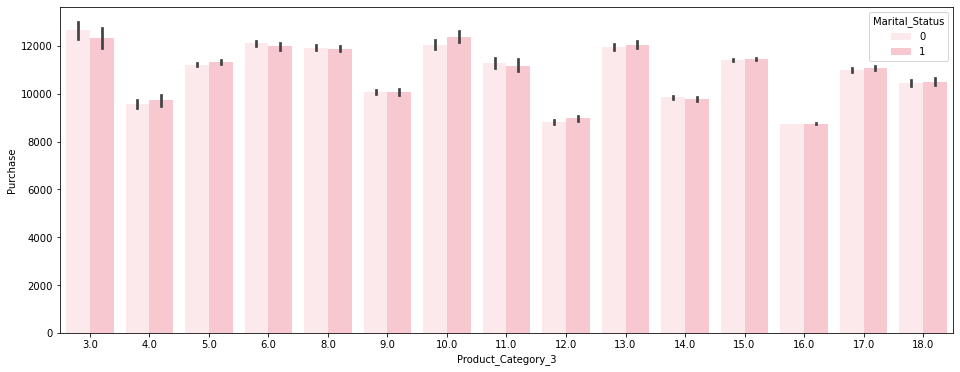

In [65]:
plt.figure(figsize=(16,6))
sns.barplot('Product_Category_3','Purchase',hue='Marital_Status',data=data_final,color='pink')

# One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.